To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Linking to GEOS 3.9.1, GDAL 3.4.3, PROJ 7.2.1; sf_use_s2() is TRUE

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"


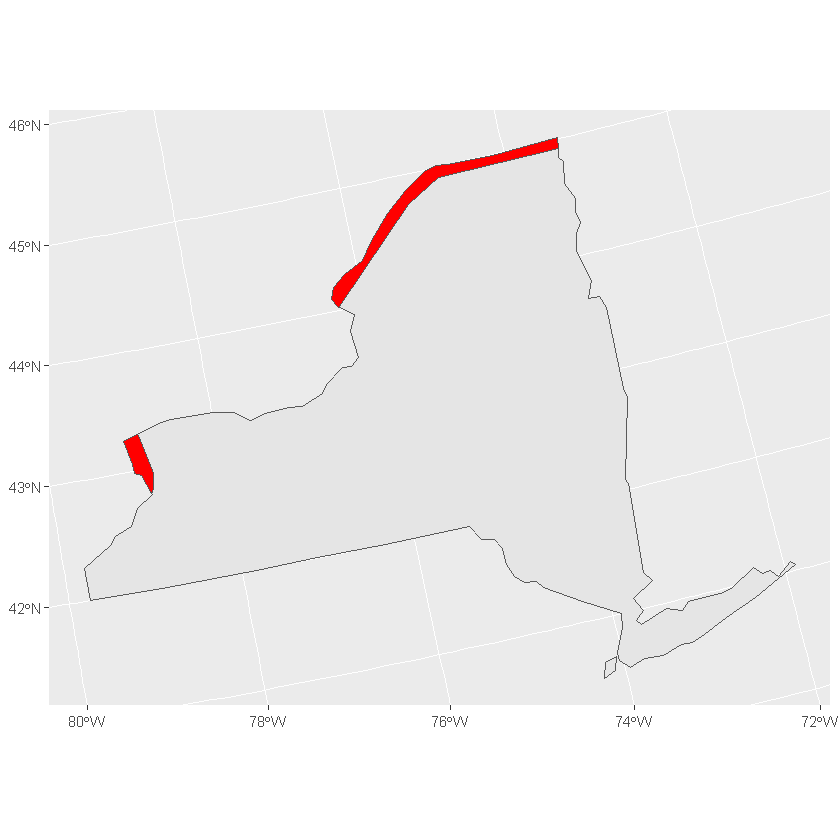

In [1]:
library(spData)
library(sf)
library(tidyverse)
data(world)  
data(us_states)

albers = "+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"

canada_buffer =  world %>% 
  st_transform(crs = albers) %>% 
  filter(name_long == "Canada") %>% 
  st_buffer(dist = 10000)

ny =  us_states %>% 
  st_transform(crs = albers) %>% 
  filter(NAME == "New York")
intersection = st_intersection(canada_buffer, ny)

ggplot() +
  geom_sf(data = ny) +
  geom_sf(data = intersection, fill = "red")